In [1]:
import pandas as pd
import seaborn as sns


In [7]:
rating = pd.read_csv(r'C:\Users\Marianela Soledad\Desktop\PI_ML_OPS\rating.csv', delimiter = ',', encoding = "utf-8")

rating.head()

,userId,rating,timestamp,id
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [8]:
rating.shape

(11024289, 4)

In [10]:
rating.dtypes

userId         int64
rating       float64
timestamp      int64
id            object
dtype: object

In [5]:
rating.duplicated().sum()

124

In [6]:
rating.drop_duplicates(inplace=True)

In [133]:
rating.duplicated().sum()

0

In [11]:
rating.isnull().sum()

userId       0
rating       0
timestamp    0
id           0
dtype: int64

In [12]:
streaming = pd.read_csv (r'C:\Users\Marianela Soledad\Desktop\PI_ML_OPS\streaming_api.csv' , delimiter = ',', encoding = 'utf -8')

streaming.head()

,id,type,title,director,cast,country,date_added,release_year,rating_x,listed_in,description,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,3.5
1,as2,movie,take care good night,girish joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",amazon,69,min,3.5
4,as5,movie,monster maker,giles foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,45,min,3.5


In [13]:
streaming.shape

(22998, 15)

In [14]:
streaming.dtypes

id                object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating_x          object
listed_in         object
description       object
platform          object
duration_int       int64
duration_type     object
score            float64
dtype: object

In [15]:
streaming.duplicated().sum()

0

In [16]:
streaming.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating_x           295
listed_in            0
description          4
platform             0
duration_int         0
duration_type      187
score                0
dtype: int64

In [ ]:
#La mayoría de datos faltantes son str

In [17]:
streaming.type.value_counts()

movie      16481
tv show     6517
Name: type, dtype: int64

In [18]:
streaming.duration_type.value_counts()

min       16232
season     6579
Name: duration_type, dtype: int64

In [19]:
streaming.duration_type.isnull().sum()

187

In [20]:
streaming.type.isnull().sum()

0

In [21]:
nuevo_streaming = streaming
#Se cambia el nombre del df para no modificar el original

In [22]:
#en donde type = movie , agregar 'min' en duration type

nuevo_streaming.loc[((nuevo_streaming['type'] == 'movie') & (nuevo_streaming['duration_type'].isna())), 'duration_type'] = 'min'

In [23]:
nuevo_streaming['duration_type'].isnull().sum()

0

In [24]:
nuevo_streaming.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating_x           295
listed_in            0
description          4
platform             0
duration_int         0
duration_type        0
score                0
dtype: int64

In [25]:
# Para completar la columna 'rating' se procederá a rellenarla con 'NaN'

nuevo_streaming['rating_x'].fillna(value='NaN', inplace=True)

In [26]:
nuevo_streaming.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating_x             0
listed_in            0
description          4
platform             0
duration_int         0
duration_type        0
score                0
dtype: int64

In [27]:
# Para continuar con la demás columnas que tienen muchos más datos nulos, 
# es útil saber el porcentaje de datos faltantes de cada una de esas columnas 
# para decidir qué hacer... 

nuevo_streaming.director.isnull().sum()/len(streaming) * 100

35.91181841899296

In [28]:
nuevo_streaming.country.isnull().sum()/len(streaming) * 100

50.0

In [29]:
nuevo_streaming.cast.isnull().sum()/len(streaming) * 100

23.1367945038699

In [30]:
nuevo_streaming.date_added.isnull().sum()/len(streaming) * 100

41.5427428472041

In [31]:
nuevo_streaming['country'].fillna(value='NaN', inplace=True)
nuevo_streaming['director'].fillna(value='NaN', inplace=True)
nuevo_streaming['cast'].fillna(value='NaN', inplace=True)
nuevo_streaming['date_added'].fillna(value='NaN', inplace=True)

In [32]:
nuevo_streaming.isnull().sum()

id               0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating_x         0
listed_in        0
description      4
platform         0
duration_int     0
duration_type    0
score            0
dtype: int64

In [33]:
nuevo_streaming['description'].fillna(value='NaN', inplace=True)

In [34]:
nuevo_streaming.isnull().sum()

id               0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating_x         0
listed_in        0
description      0
platform         0
duration_int     0
duration_type    0
score            0
dtype: int64

In [ ]:
#Completados los datos faltantes, ahora se debe tomar la decisión si 
#todas las columnas de DF serán necesarias para el modelo

In [35]:
eda_streaming = nuevo_streaming

In [36]:
eda_streaming.head()

,id,type,title,director,cast,country,date_added,release_year,rating_x,listed_in,description,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,3.5
1,as2,movie,take care good night,girish joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",amazon,69,min,3.5
4,as5,movie,monster maker,giles foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,45,min,3.5


In [37]:
eda_streaming.rename(columns={ 'rating_x':'rated'}, inplace=True)

eda_streaming.head()

,id,type,title,director,cast,country,date_added,release_year,rated,listed_in,description,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,3.5
1,as2,movie,take care good night,girish joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",amazon,69,min,3.5
4,as5,movie,monster maker,giles foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,45,min,3.5


Se procede a realizar las representaciones gráficas para ver el comportamiento de las variables:

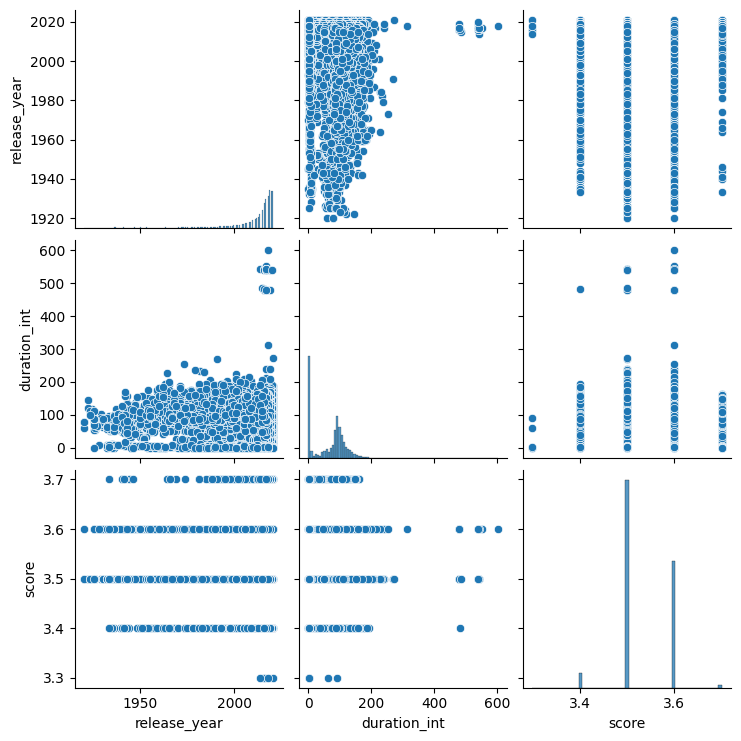

In [38]:
sns.pairplot(data=eda_streaming)

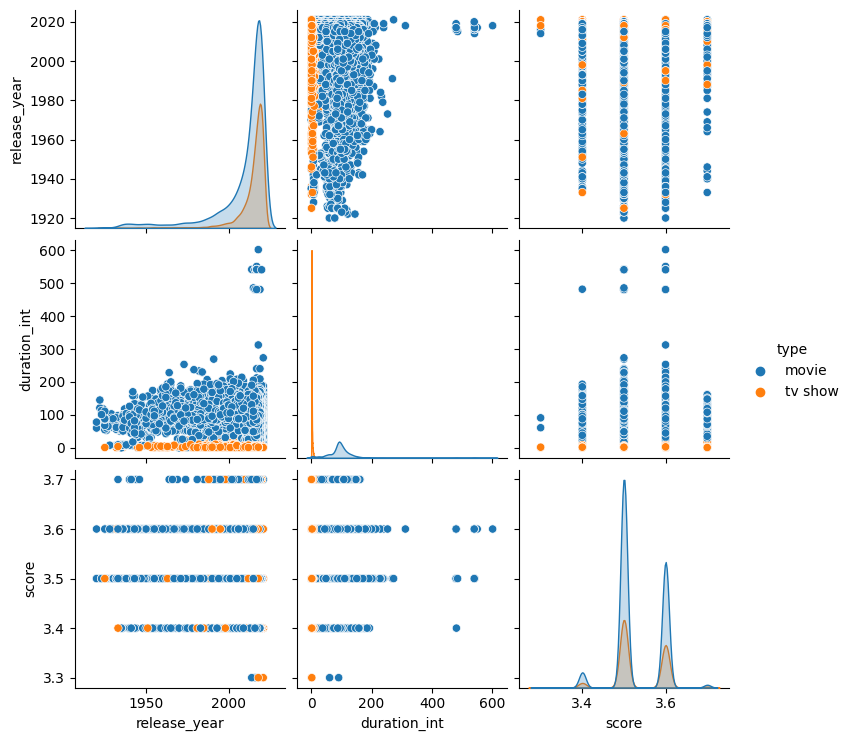

In [39]:
sns.pairplot(data=eda_streaming, hue='type')

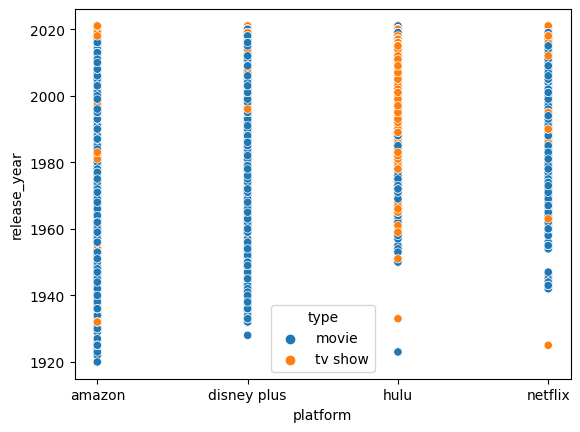

In [40]:
ax = sns.scatterplot(x="platform", y="release_year", hue='type', data=eda_streaming)

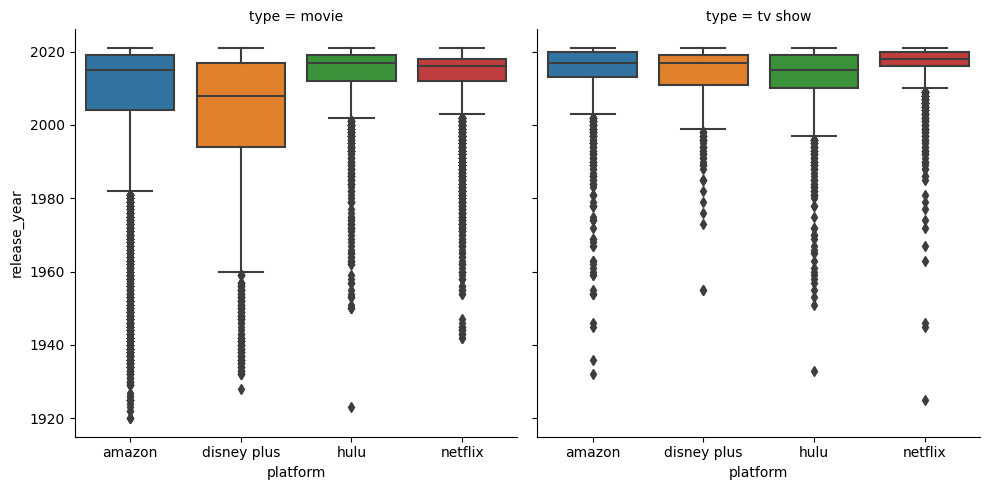

In [41]:
sns.catplot(x='platform', y='release_year', col="type", kind='box' , data=eda_streaming)

# En este gráfico podría considerarse ciertos outliers:
# - Movies en amazon anteriores a 1980
# - Movies en disney plus anteriores a 1960
# - Movies en hulu anteriores a 2000
# - Movies en netflix anteriores a 2000
# Mientras que para tv show:
# - En amazon, anteriores a 2005
# - En disney plus, anteriores a 2000
# - En hulu, anteiores a 200
# - En netflix anteriores a 2010

# Considero necesario aplicar otro tipo de gráfico para corroborar la información anterior

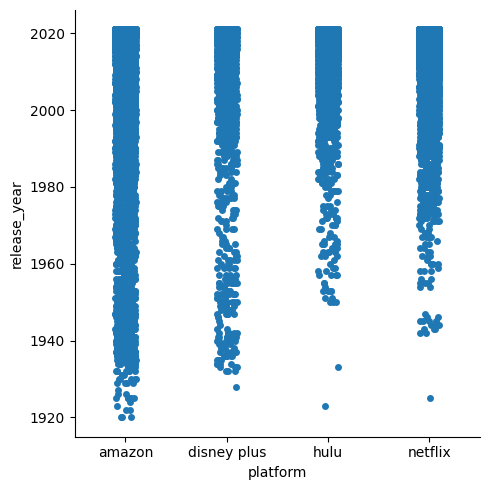

In [42]:
sns.catplot(data = eda_streaming, x = 'platform', y = 'release_year')

# En este gráfico se puede apreciar la totalidad de títulos en cada plataforma:
# - Amazon posee títulos desde el año 1920, lo cual podría significar que si el usuario
# quisiera ver movie o tv show antigua, sería más probable que elija esa plataforma.
# - Disney plus podría contener menor cantidad, pero también tiene diversos títulos desde el año 1930
# - Hulu posee títulos más modernos, desde 1950, y su mayoría van desde 1980
# - Netflix tiene mayoría de títulos de 1970, pero si el usuario quisiera ver una película del año 
# 1955 en adelante, podría encontrarla en esta plataforma.

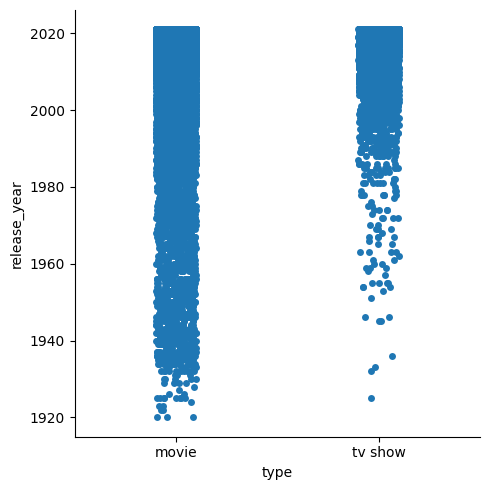

In [43]:
sns.catplot(data = eda_streaming, x = 'type', y = 'release_year')

# En este gráfico se aprecia que, la mayoría de títulos son movies, desde el año 1920
# Y tv show, la mayoría, desde 1980...
# Habría más probabilidades de recomendar una película antigua (de 1920 a 1960) que una serie. 

<AxesSubplot: xlabel='type', ylabel='Count'>

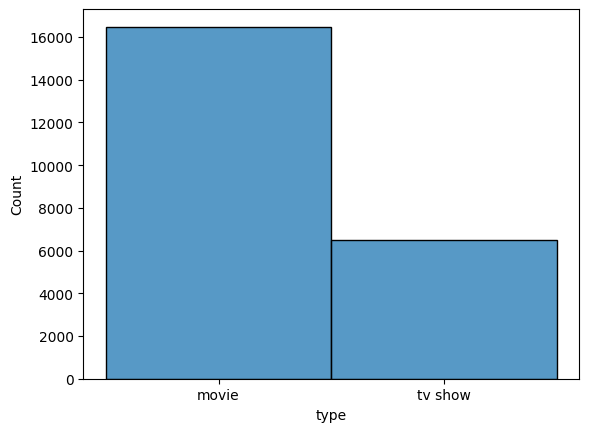

In [44]:
sns.histplot(data=eda_streaming, x='type')

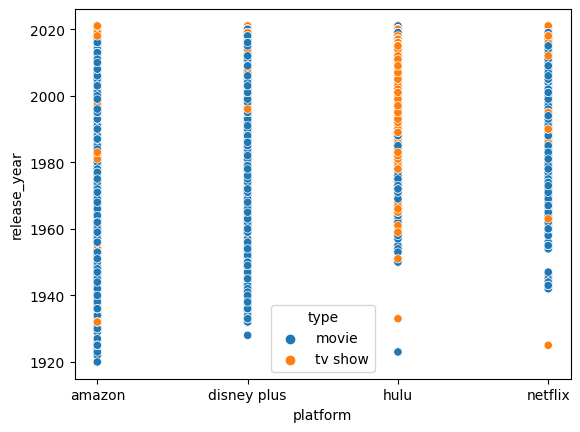

In [45]:
ax = sns.scatterplot(x="platform", y="release_year", hue='type', data=eda_streaming)

<AxesSubplot: xlabel='score', ylabel='release_year'>

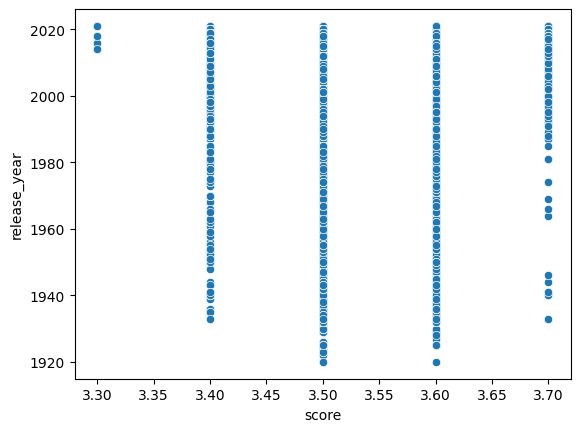

In [46]:
sns.scatterplot(data=eda_streaming, x='score', y='release_year')

<AxesSubplot: xlabel='platform', ylabel='count'>

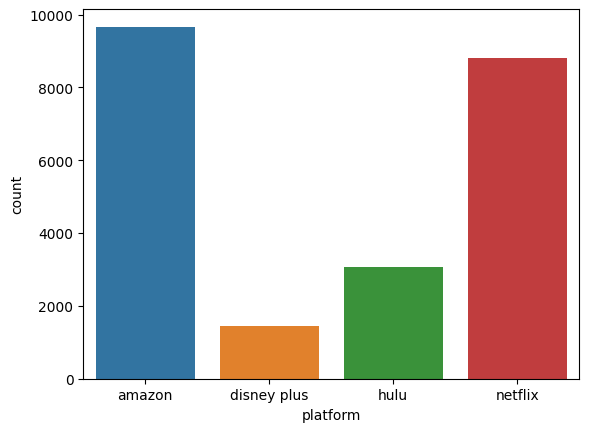

In [47]:
sns.countplot(data=eda_streaming, x='platform')

<AxesSubplot: xlabel='type', ylabel='count'>

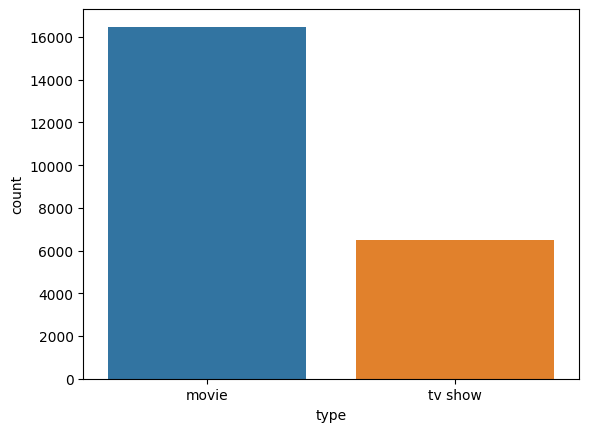

In [48]:
sns.countplot(data=eda_streaming, x='type')

C:\Users\Marianela Soledad\AppData\Local\Temp\ipykernel_5452\2979881689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=eda_streaming.corr())


<AxesSubplot: >

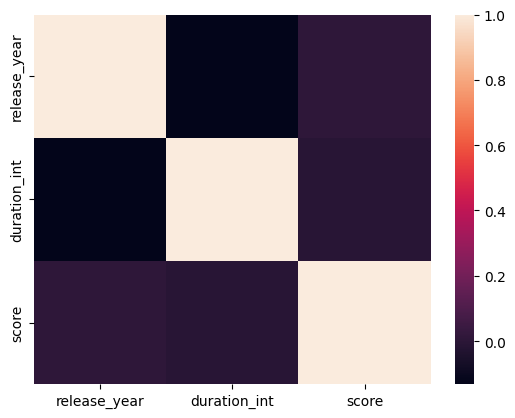

In [49]:
sns.heatmap(data=eda_streaming.corr())

<AxesSubplot: xlabel='release_year', ylabel='Count'>

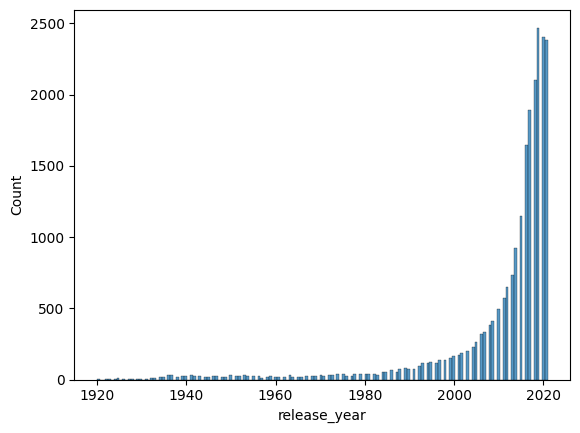

In [50]:
sns.histplot(data=eda_streaming, x="release_year")

<AxesSubplot: xlabel='release_year'>

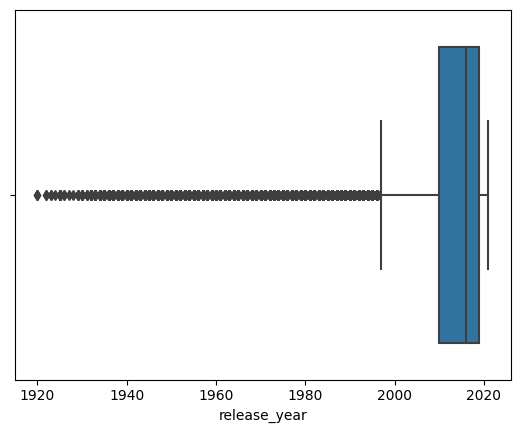

In [51]:
sns.boxplot(x="release_year", data=eda_streaming)

<AxesSubplot: xlabel='release_year', ylabel='score'>

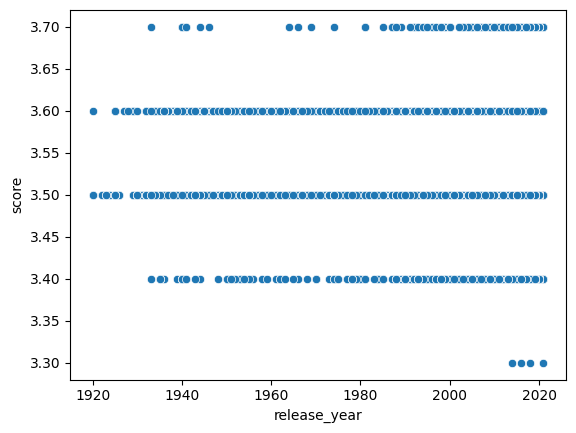

In [52]:
sns.scatterplot(data=eda_streaming, x="release_year", y='score')

<AxesSubplot: xlabel='duration_int', ylabel='score'>

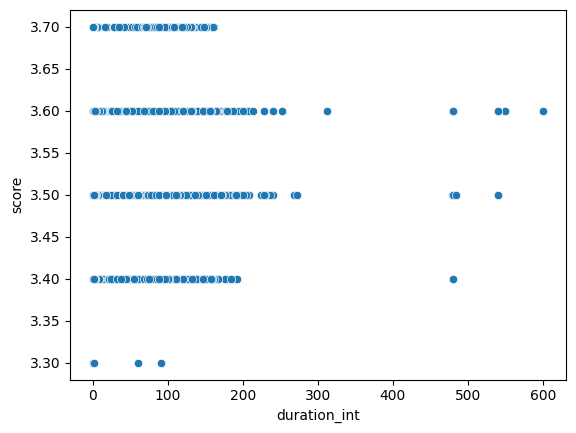

In [53]:
sns.scatterplot(data=eda_streaming, x="duration_int", y='score')

# Este gráfico indica que los títulos de mayor puntaje, 3.70, serían aquellos 
# cuya duración es menor a 180 min.
# Mientras que, los de puntaje promedio (3.60 y 3.50) tendrían una duración 
# hasta 280 min.
# Y por último, el menor puntaje (3.40) lo tendrían la mayoría de títulos 
# cuya duración es hasta 200 min. 

In [ ]:
# En función del análisis anterior dimos cuenta que hay columnas que 
# aportan información más pertinente que otras. 
# Por lo que las borraré para achicar el dataset:

In [54]:
eda_streaming.head()

,id,type,title,director,cast,country,date_added,release_year,rated,listed_in,description,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,amazon,113,min,3.5
1,as2,movie,take care good night,girish joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,amazon,110,min,3.5
2,as3,movie,secrets of deception,josh webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,amazon,74,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",amazon,69,min,3.5
4,as5,movie,monster maker,giles foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,amazon,45,min,3.5


In [55]:
eda_streaming.drop(columns='country' , inplace=True)
eda_streaming.drop(columns='director' , inplace=True)
eda_streaming.drop(columns='cast' , inplace=True)
eda_streaming.drop(columns='date_added' , inplace=True)
eda_streaming.drop(columns='description' , inplace=True)

eda_streaming.head()

,id,type,title,release_year,rated,listed_in,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,2014,g,"comedy, drama",amazon,113,min,3.5
1,as2,movie,take care good night,2018,13+,"drama, international",amazon,110,min,3.5
2,as3,movie,secrets of deception,2017,g,"action, drama, suspense",amazon,74,min,3.5
3,as4,movie,pink: staying true,2014,g,documentary,amazon,69,min,3.5
4,as5,movie,monster maker,1989,g,"drama, fantasy",amazon,45,min,3.5


In [56]:
eda_streaming.to_csv('eda streaming.csv', index=False)